# Tutorial on Toy Generation  to be used for limit production

#### Some intro here...  //FIXME TODO

First of all I suggest you to produce a single compilable macro that contains the likelihood you want to use, you can find in other tutorial how to define the likelihood [here](https://xenon1t.github.io/Xephyr/docs/tutorials.html). The idea of this macro is to define a function that you can use to retrieve the likelihood, so that you have it defined in one place only. You can get inspiration on how to write this function from [here](https://github.com/XENON1T/SR1Results/blob/master/StatisticalAnalyses/xephyr_sr1_likelihood/src/likelihoodDef.cxx)

In [1]:
.x loadXephyr.C

Info in <TUnixSystem::ACLiC>: creating shared library /home/pan/work/XEPHYR_PKG/Xephyr/notebooks/./../src/ToyGenerator_cxx.so


(int) 0


In [2]:
// add path to include files to ROOT (in the file I'm going to load there are some Xephyr includes) 
gInterpreter->AddIncludePath("../src");  // in this case is just XEPHYR src from next dir.

// now load the function to retrieve the likelihood

In [3]:
.L ../../SR1/StatisticalAnalyses/xephyr_sr1_likelihood/src/likelihoodDef.cxx

In [4]:
pdfLikelihood likeHood = getTheLikelihood(50.);  // 50. GeV mass

pdfLikelihood - INFO: bkg component named hband added to    SAFEGUARDED
pdfLikelihood::initialize - INFO :  initialize..... 
	Likelihood::addParameter - Info : Adding parameter Sigma  with ID -1  to PL xe1T
INFO :  adding sys for BKG component hband
	Likelihood::addParameter - Info : Adding parameter ERscale  with ID 1  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _PY  with ID 2  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _RF  with ID 3  to PL xe1T
INFO :  adding sys for SIGNAL component wimp_0050gev
	Likelihood::addParameter - Info : Adding parameter _gamma_  with ID 4  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _alpha_  with ID 5  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _eta_  with ID 6  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _acceptance_par_  with ID 7  to PL xe1T

------ WARNING -------  Safeguard is turned OFF altough you have set components to be safeguarded this is ignored --

In [5]:
TString treeName = "treeName";
TString pathOfFile = "./";
ToyGenerator toy(treeName,pathOfFile);  // (string 'name', string 'out dir')

In [6]:
toy.setLikelihood(&likeHood);

In [7]:
toy.setSeed(127);    // you should change the seed as a function of wimp mass and injected signal strenght

In [8]:
toy.randomizeNuissanceParameter();

ToyGenerator::randomizeNuissanceParameter - INFO : Randomizing parameters:
ToyGenerator:: - INFO : Skipping paramater: Sigma
ToyGenerator:: - WARNING : Following parameter is FREE and will be extracted from uniform distro. ERscale
ToyGenerator:: - INFO : Skipping paramater: _gamma_
ToyGenerator:: - INFO : Skipping paramater: _eta_
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Free            0.24                 
  2 _PY                  Nuisance           1                 
  3 _RF                  Nuisance        -1.3                 
  4 _gamma_              Fixed              0                 
  5 _alpha_              Nuisance       -0.68                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Nuisance        0.38                 


#### now we generate data:
ToyGenerator::generateData(double mu, int N) ---> mu = signal multiplier,  N = number of datasets

In [9]:
toy.generateData(5,10);           // generated science data: generateData(double mu, int N, bool randomizeNP = true);

toy.setAverageCalibrationEvents(10000);
//toy.generateCalibration(10);      // generate calibration data: generateCalibration(int N, bool randomizeNP = true);

ToyGenerator::randomizeNuissanceParameter - INFO : Randomizing parameters:
ToyGenerator:: - INFO : Skipping paramater: Sigma
ToyGenerator:: - WARNING : Following parameter is FREE and will be extracted from uniform distro. ERscale
ToyGenerator:: - INFO : Skipping paramater: _gamma_
ToyGenerator:: - INFO : Skipping paramater: _eta_
 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Free             2.7                 
  2 _PY                  Nuisance        0.95                 
  3 _RF                  Nuisance       -0.85                 
  4 _gamma_              Fixed              0                 
  5 _alpha_              Nuisance       -0.12                 
  6 _eta_                Fixed              0                 
  7 _acceptance_par_     Nuisance       -0.51                 


### Let's have a look at what we've created
In the specified directory you'll get a file named with your specified "TreeName" with N trees inside.
Each tree contains a TList of the parameter values that have been extracted and considered as the truth for that toy dataset and can be accessed with TTree::GetUserInfo() method.

The Trees contain 3 branches: cs1, cs2 and type. Type is a string that define the type of the specific event, and reports the name of the histogram from which has been extracted.

In [10]:
TFile *file = TFile::Open(pathOfFile + treeName + ".root");  // science data
//TFile *file = TFile::Open(pathOfFile + treeName + "_Cal.root");  // calibration data
file->ls();

TFile**		./treeName.root	
 TFile*		./treeName.root	
  KEY: TTree	treeName0;1	generated toy data
  KEY: TTree	treeName1;1	generated toy data
  KEY: TTree	treeName2;1	generated toy data
  KEY: TTree	treeName3;1	generated toy data
  KEY: TTree	treeName4;1	generated toy data
  KEY: TTree	treeName5;1	generated toy data
  KEY: TTree	treeName6;1	generated toy data
  KEY: TTree	treeName7;1	generated toy data
  KEY: TTree	treeName8;1	generated toy data
  KEY: TTree	treeName9;1	generated toy data


In [11]:
TTree *tree = (TTree*)file->Get(treeName+"1"); // science data
//TTree *tree = (TTree*)file->Get(treeName+"_Cal1");  // calibration

In [12]:
TList *l = tree->GetUserInfo();  // this is a list stored in TTree
l->Print();                      // let's print the params for one tree, they are stored in TParameter class type.

Collection name='UserInfo', class='TList', size=8
  TParameter<double>	Sigma = 5
  TParameter<double>	ERscale = 2.72791
  TParameter<double>	_PY = 0.949941
  TParameter<double>	_RF = -0.850848
  TParameter<double>	_gamma_ = 0
  TParameter<double>	_alpha_ = -0.11721
  TParameter<double>	_eta_ = 0
  TParameter<double>	_acceptance_par_ = -0.512817


In [13]:
tree->Print();

******************************************************************************
*Tree    :treeName1 : generated toy data                                     *
*Entries :       93 : Total =            4180 bytes  File  Size =       2007 *
*        :          : Tree compression factor =   1.61                       *
******************************************************************************
*Br    0 :cs1       : cs1/F                                                  *
*Entries :       93 : Total  Size=        913 bytes  File Size  =        447 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :cs2       : cs2/F                                                  *
*Entries :       93 : Total  Size=        913 bytes  File Size  =        447 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

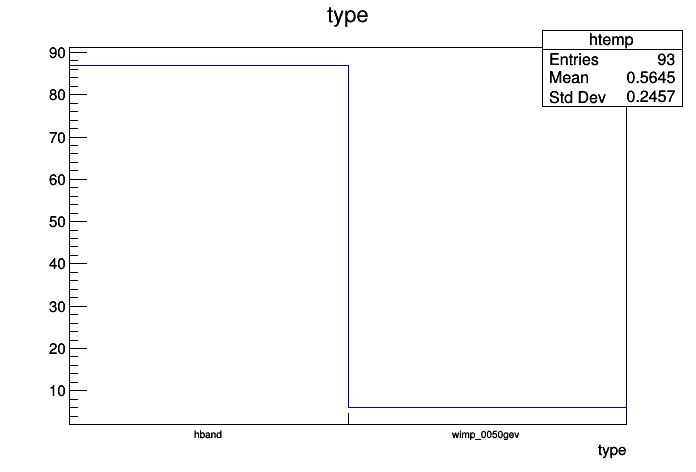

In [14]:
TCanvas *c2 = new TCanvas();
tree->Draw("type");
c2->Draw();

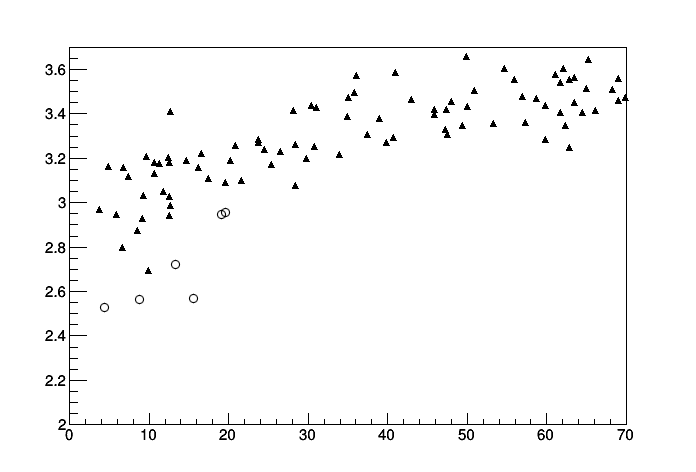

In [15]:
TCanvas *c4 = new TCanvas();
gStyle->SetOptTitle(kFALSE);
gStyle->SetOptStat(0);

TH2F *h = new TH2F("h","signal",100,0,70,100,2,3.7);
h->SetMarkerStyle(kOpenCircle);
tree->Draw("cs2:cs1>>h","type==\"wimp_0050gev\"");  // this is actually log10(cs2)
TH2F *h2 = new TH2F("h2","ER bkg",100,0,70,100,2,3.7);
h2->SetMarkerStyle(kFullTriangleUp);
tree->Draw("cs2:cs1>>h2","type==\"hband\"");  // "hband" is the unfortunate name of the ER bkg component, but hey that's the name of the histo...
h->Draw("P");
h2->Draw("SAME P");
//gPad->BuildLegend();
c4->Draw();